## Install all dependencies

In [1]:
! pip list


Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.6
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.54.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.66.1
h5py                         3.11.0
idna                         3.10
ipykernel                    6.29.5
ipython                      8.27.0
jedi                         0.19.1
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.5.0



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.8.30
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.6
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.54.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.66.1
h5py                         3.11.0
idna                         3.10
ipykernel                    6.29.5
ipython                      8.27.0
jedi                         0.19.1
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.5.0



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr

## Get data from Kaggle
### https://www.kaggle.com/datasets/khaledsayedaaaaa/happyy
### https://www.kaggle.com/datasets/khaledsayedaaaaa/ssadd

## Remove dodgy images

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Load data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

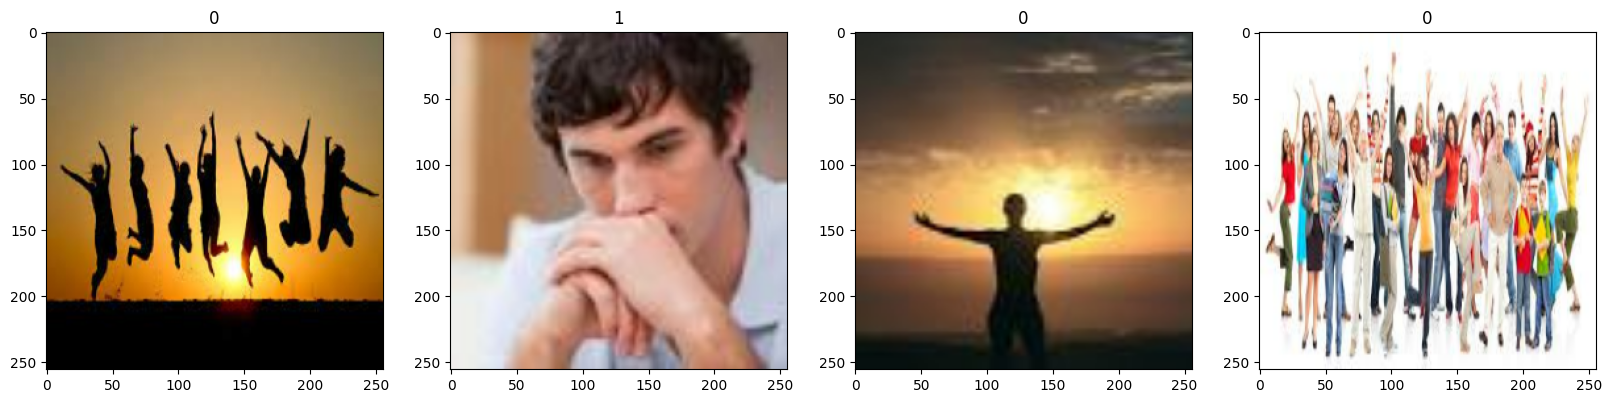

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scale data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.14901961, 0.15686275, 0.14509805],
          [0.14901961, 0.15686275, 0.14509805],
          [0.14901961, 0.15686275, 0.14509805],
          ...,
          [0.21997549, 0.2435049 , 0.22781862],
          [0.22610295, 0.24963236, 0.23394608],
          [0.22745098, 0.2509804 , 0.23529412]],
 
         [[0.14901961, 0.15686275, 0.14509805],
          [0.14901961, 0.15686275, 0.14509805],
          [0.14901961, 0.15686275, 0.14509805],
          ...,
          [0.22106814, 0.24459755, 0.22891128],
          [0.2257475 , 0.2492769 , 0.23359063],
          [0.22677696, 0.25030637, 0.2346201 ]],
 
         [[0.14901961, 0.15686275, 0.14509805],
          [0.14901961, 0.15686275, 0.14509805],
          [0.14901961, 0.15686275, 0.14509805],
          ...,
          [0.22603473, 0.24956414, 0.23387787],
          [0.22413187, 0.24766128, 0.231975  ],
          [0.22371323, 0.24724264, 0.23155637]],
 
         ...,
 
         [[0.02352941, 0.0627451 , 0.05882353],
          [0.02352

## Split data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [17]:
train_size

7

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Build Deep Learning Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\img-clf\imageclassif\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 928ms/step - accuracy: 0.5404 - loss: 0.8653 - val_accuracy: 0.4531 - val_loss: 0.9016
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 918ms/step - accuracy: 0.4995 - loss: 0.7872 - val_accuracy: 0.6562 - val_loss: 0.6253
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 998ms/step - accuracy: 0.7403 - loss: 0.6187 - val_accuracy: 0.7031 - val_loss: 0.6001
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 964ms/step - accuracy: 0.7886 - loss: 0.5225 - val_accuracy: 0.7500 - val_loss: 0.4355
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 952ms/step - accuracy: 0.8181 - loss: 0.3998 - val_accuracy: 0.9219 - val_loss: 0.2612
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 902ms/step - accuracy: 0.9160 - loss: 0.2954 - val_accuracy: 0.7656 - val_loss: 0.4332
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 977ms/step - accuracy: 0.8126 - loss: 0.4343 - val_accuracy: 0.8906 - val_loss: 0.3073
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 832ms/step - accuracy: 0.9210 - loss: 0.2519 - val_accuracy: 0.8438 - val_loss:

## plot performance

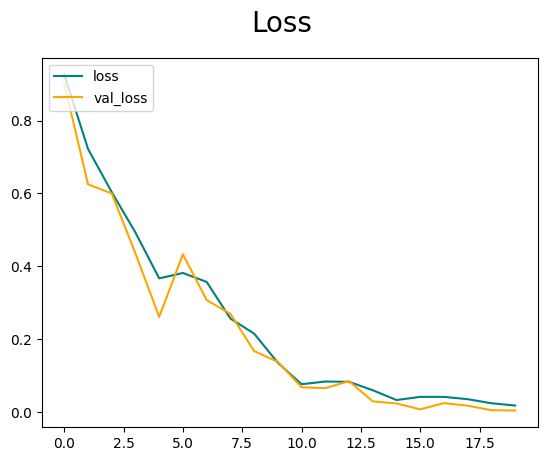

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

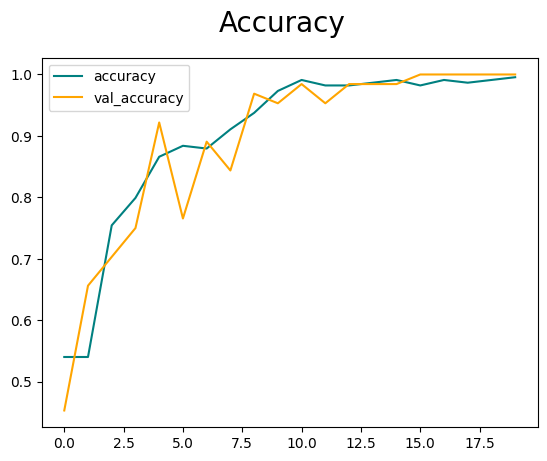

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## Test


In [34]:
import cv2

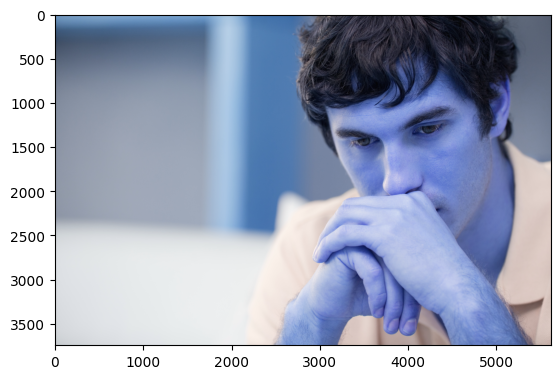

In [35]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

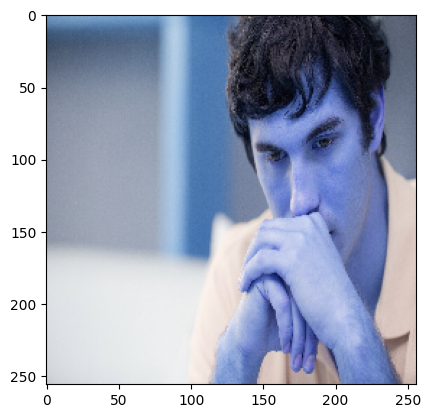

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [38]:
yhat

array([[0.76526576]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


## Save the Model¶

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save('imageclassifier.h5')

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[0.76526576]], dtype=float32)